## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
len(df['user_id'].unique())

290584

d. The proportion of users converted.

In [5]:
len(df[df['converted'] == 1]['user_id'].unique())/len(df['user_id'].unique())

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('(landing_page == "new_page" and group != "treatment") | (group == "treatment" & landing_page != "new_page")')['user_id'].count()


3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query('(group == "treatment" & landing_page == "new_page") | (group == "control" & landing_page == "old_page")')
df2.shape[0]

290585

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()].sort_values("user_id")


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'].duplicated()].sort_values("user_id")


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop_duplicates(subset='user_id')

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
P𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛 = len(df2.query('converted == 1'))/df2.shape[0]
P𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
P𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛_control = len(df2.query('group == "control" & converted == 1'))/ len(df2.query('group=="control"'))
P𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
P𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛_treatment =len(df2.query('group == "treatment" & converted == 1'))/ len(df2.query('group=="treatment"'))
P𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
P𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛_new_page =len(df2.query('landing_page == "new_page"'))/ df2.shape[0]
P𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛_new_page 

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

- probability of an individual converting regardless of the page they receive : 0.11959708724499628

- probability that an individual received the new page : 0.5000619442226688
- control(old page)(0.1203863045004612) has probability they converted a little more than treatment (new page) (0.11880806551510564)
- we can't say that new page leads to more conversions, the probability of new page is roughly 50% .

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

- Null hypothese is  H0 :  pold  >=  pnew
 
- Alternative hypothese is  H1 :  pold  <  pnew

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
P_new = df2.query(' converted==1')['user_id'].nunique()/float(df2['user_id'].nunique())
P_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
P_old = df2.query(' converted==1')['user_id'].nunique()/float(df2['user_id'].nunique())
P_old

0.11959708724499628

c. What is $n_{new}$?

In [20]:
N_new = df2.query('group=="treatment"  ')['user_id'].nunique()
N_new

145310

d. What is $n_{old}$?

In [21]:
N_old = df2.query('group=="control"  ')['user_id'].nunique()
N_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# Simulate a Sample for the treatment Group
new_page_converted= np.random.choice([0,1],N_new,p=[P_new,1-P_new])
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# Simulate a Sample for the control Group
old_page_converted= np.random.choice([0,1],N_old,p=[P_old,1-P_old])
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
diff = new_page_converted.mean()-old_page_converted.mean()
diff

-0.0004728508360168915

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
# Sampling distribution 
p_diffs = []
for _ in range(10000) : 
    new_page_converted = np.random.choice([0,1],N_new,p=[P_new,1-P_new])
    old_page_converted=np.random.choice([0,1],N_old,p=[P_old,1-P_old])
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

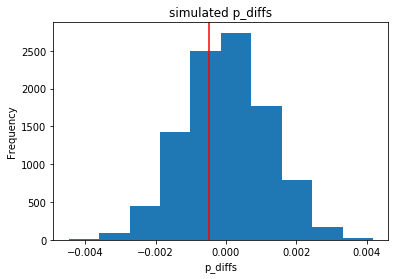

In [26]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('simulated p_diffs');
plt.axvline(diff,color='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [40]:
actual_diff = df2.query('group == "treatment"')['converted'].mean(
) - df2.query('group == "control"')['converted'].mean()
actual_diff

-0.0015782389853555567

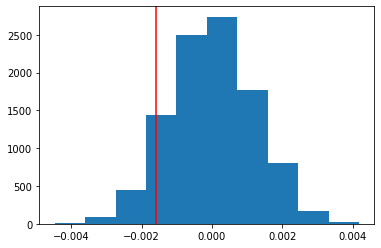

In [28]:
plt.hist(p_diffs)
plt.axvline(actual_diff, color='r')

In [41]:
p_diffs = np.array(p_diffs)
p_val = (p_diffs > actual_diff).mean()
p_val


0.9085

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
What is this value called in scientific studies?

  - Answer : The value is called P-Value.
  
What does this value signify in terms of whether or not there is a difference between the new and old pages?

  - Answer : there is a difference between the new and old pages P-Value > Type I error rate (0.05) So we fail to reject the null hypothesis, so that the control page has higher probability of convert rate than treatment page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()

# number of conversions with the new_page
convert_old =df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

# number of individuals who were shown the old_page
n_old =df2.query('landing_page == "old_page"')['user_id'].nunique()


# number of individuals who received new_page
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
convert_new,convert_old,n_new,n_old

(17264, 17489, 145310, 145274)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

The z-score is approximately -1.31 and the p-value is aboout 0.905. And we know that the critical value is 1.64, which is greater than the value of z-score we computed above. So we can not reject the null hypothesis. We think there is no difference between the old and new pages. The conclusion is the same as the findings in parts j. and k.. We reach the same goal by different means.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

This is a logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
import statsmodels.api as sm
# ab_page column, which is 1 when an individual receives the treatment and 0 if control.
df2['intercept']=1
df2['ab_page']=pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
Log_Mod= sm.Logit(df2['converted'],df2[['intercept','ab_page']])

Resualt = Log_Mod.fit()
Resualt.params

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


intercept   -1.988777
ab_page     -0.014989
dtype: float64

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
Resualt.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-07-21 10:00 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

the p-value associated with ab_page is 1.9888 , P-Value > Type I error rate (0.05) this mean

differ from the value you found in Part II

p-value in Part II the null and alternative hypotheses :

Null hypothese is  H0:  pold >=  pnew
 
Alternative hypothese is  H1 :  pold <  pnew
 
p-value in Part III the null and alternative regression model :

Null hypothese is  H0 :  pold  -  pnew=0

Alternative hypothese is  H1 :  pold  -  pnew  !=0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

yes there is other things that might influence whether or not an individual converts

Disadvantages to adding additional terms into your regression model:

-using incomplete data

-falsely concluding that a correlation is a causation.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
countries_df['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [35]:
# Join with the df2 dataframe
df_merged=df2.merge(countries_df,on='user_id',how='left')
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [36]:
# Create the necessary dummy variables
df_merged[['CA','UK','US']] = pd.get_dummies(df_merged['country'])
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [37]:
# Fit your model, and summarize the results
#Create intercept variable
df_merged['intercept'] = 1
logit_mod = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'US']])
Result = logit_mod.fit()
Result.params

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


intercept   -2.030029
ab_page     -0.014943
UK           0.050640
US           0.040757
dtype: float64

In [38]:
Result.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2022-07-21 10:00 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [39]:
df_merged['UK_ab_page'] = df_merged['UK']*df_merged['ab_page'] 

df_merged['CA_ab_page'] = df_merged['CA']*df_merged['ab_page'] 

logit3 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'CA', 'UK_ab_page', 'CA_ab_page']])

results = logit3.fit()
print(results.params)
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
intercept    -1.986478
ab_page      -0.020564
UK           -0.005744
CA           -0.017528
UK_ab_page    0.031398
CA_ab_page   -0.046885
dtype: float64


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-07-21 10:00 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK_ab_page    0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
CA_ab_page   -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
==================================================================

"""

- Look at all of p-values in the summary, and compare against the Type I error rate (0.05).
    - the ab_page p-value associated is 0.1323 , P-Value > Type I error rate (0.05)
    - the UK p-value associated is 0.7598 , P-Value > Type I error rate (0.05)
    - the CA p-value associated is 0.6418 , P-Value > Type I error rate (0.05)
    - the UK_ab_page p-value associated is 0.2377 , P-Value > Type I error rate (0.05)
    - the CA_ab_page p-value associated is 0.3833 , P-Value > Type I error rate (0.05)
- Can you reject/fail to reject the null hypotheses (regression model)?
    - yes we fail to reject the null hypotheses
- Comment on the effect of page and country to predict the conversion.
    - The country do not appear to impact conversions.

<a id='conclusions'></a>
## Conclusions

#### After tests the three different tests, we came to the same result in all three, which is to keep the old page and not change it with the new page. As there is insufficient evidence to say that the new page conversion rate is higher than the old page conversion rate, and there is also no evidence that countries are affected by the conversion rate.

#### It is better for the developer teams to design another new page or improve the old one.